## Verify single slow mode excited by Legevin antenna in agk

###### $k_\perp\rho_p = 0.1$, $\beta_p = 1.0$

In [12]:
import numpy as np
from py_vlasov.follow_parameter import change_angle, change_beta, change_k, change_tetp
from py_vlasov.transport_ratios import input_gen, transport_ratios
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#---------------#
# Rotate angle  #
#---------------#
k = 0.1
theta = 85
beta = 0.2
tetp = 1
method = 'numpy'
mratio = 1836
n = 10
aol = 1/5000
"-------------------"
target_angle = 89.95
# freq = 0.01190802-0.00635779j # slow mode
freq = 1.95444741e-02 -6.32084029e-06j # Alfven mode
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 50
show_plot = True
def follow_angle_fn(prev_freq, prev_angle, cur_angle):
    cos_prev = np.cos(prev_angle * np.pi/180)
    cos_cur = np.cos(cur_angle * np.pi/180)
    return prev_freq * cos_cur/cos_prev

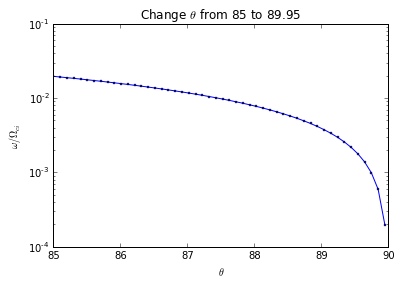

In [14]:
freq_angle = change_angle(freq, param, target_angle, num, follow_angle_fn, show_plot=True)

In [17]:
#---------------#
# increase beta #
#---------------#
k = 0.1
theta = target_angle
"-------------------"
target_beta = 1.0
freq = freq_angle
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 20

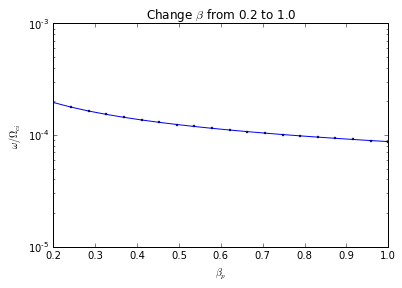

In [18]:
freq_beta = change_beta(freq, param, target_beta, num, show_plot=True)

In [19]:
theta_rad = np.pi * target_angle/180
kperp = k * np.sin(theta_rad)
kpar = k * np.cos(theta_rad)
inp = input_gen(freq_beta, kperp, kpar, target_beta, tetp)
res = transport_ratios(inp, True);

eigen E = [ -2.54e+04 +3.06e+03j  -0.00e+00 -1.00e+00j   4.85e-02 -1.80e-02j]
p_e_b0 = 2.5e+04-3.1e+03j
p_b_b0 = 2.5e+04-3.1e+03j
p_b_k = 0.044+0.0054j
c_bb = 1.5e-09
helicy = 0.089
E_L/E_tot = 1
compressibility = [ 0.  0.]
parallel compressibility = [-0.98+0.28j -0.98+0.28j]
cross helicty = [-1.    0.05]


In [23]:
res['c_bb'] * np.tan(target_angle * np.pi/180.)**2

0.0019955529697664636